In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install --upgrade --force-reinstall numpy pandas matplotlib seaborn --quiet
# !pip install ppscore --quiet
# !pip install ydata-profiling --quiet
# !pip install sweetviz --quiet

In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Data Science/Projects/P596 Bankruptacy Prevention/Bankruptcy (2).xlsx")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df.shape

(250, 7)

In [ ]:
df.size

1750

In [ ]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [ ]:
df.nunique()

,0
industrial_risk,3
management_risk,3
financial_flexibility,3
credibility,3
competitiveness,3
operating_risk,3
class,2


In [ ]:
df.isnull().sum()

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [ ]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr(numeric_only=True)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


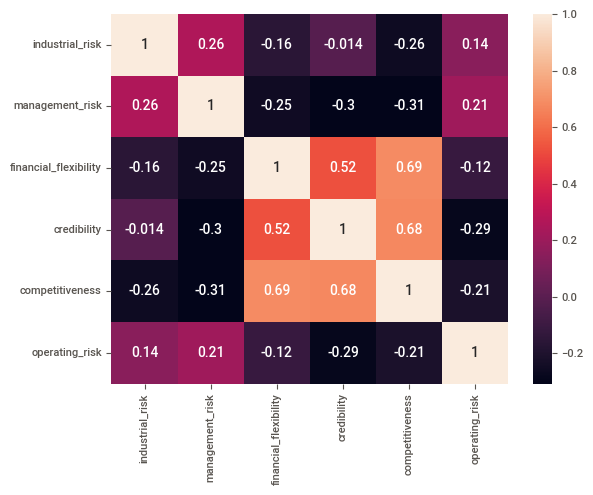

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot= True)
plt.show()

In [ ]:
import ppscore as pps
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
1,industrial_risk,management_risk,0.108761,regression,True,mean absolute error,0.362,0.322629,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.352,0.352440,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346,0.361087,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.015113,regression,True,mean absolute error,0.388,0.382136,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.386,0.387298,DecisionTreeRegressor()
6,industrial_risk,class,0.324066,classification,True,weighted F1,0.456,0.632292,DecisionTreeClassifier()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338,0.348953,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
9,management_risk,financial_flexibility,0.042517,regression,True,mean absolute error,0.352,0.337034,DecisionTreeRegressor()


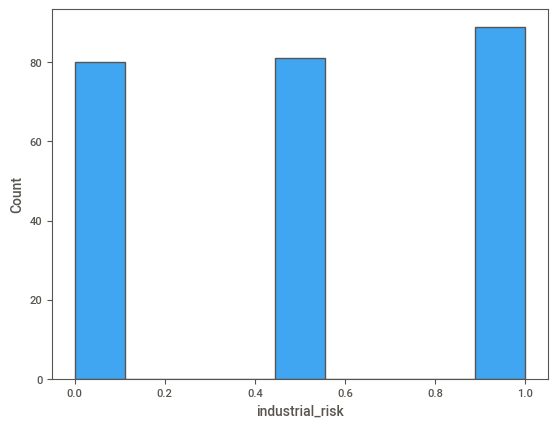

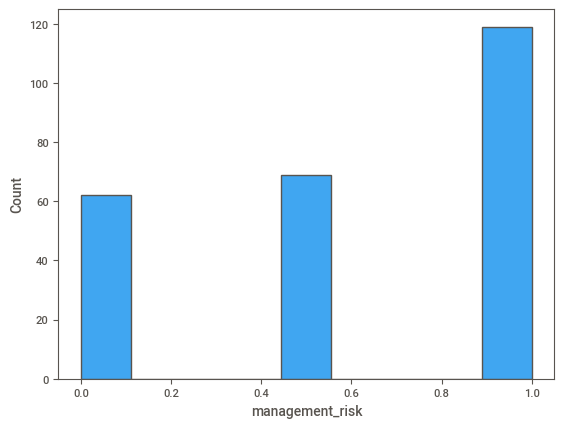

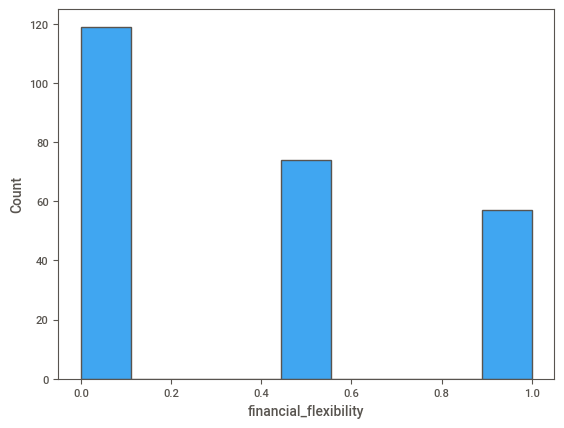

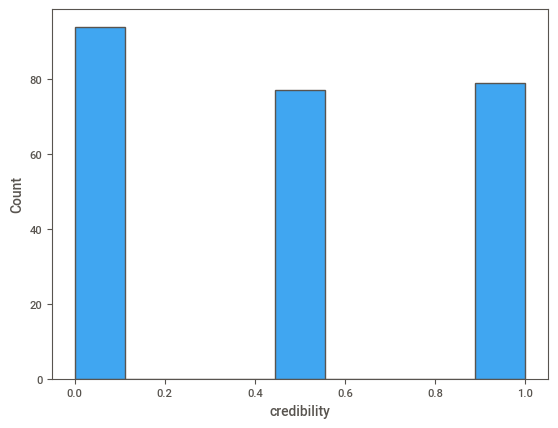

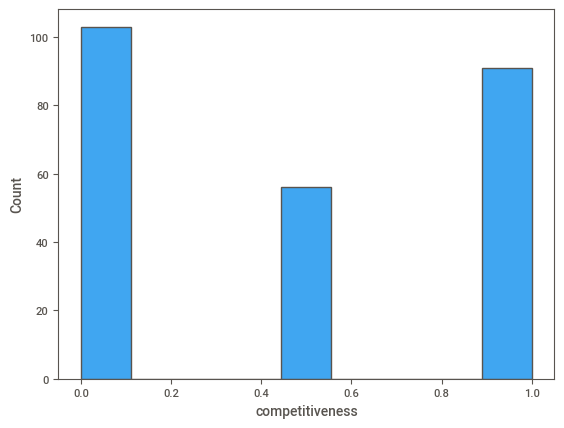

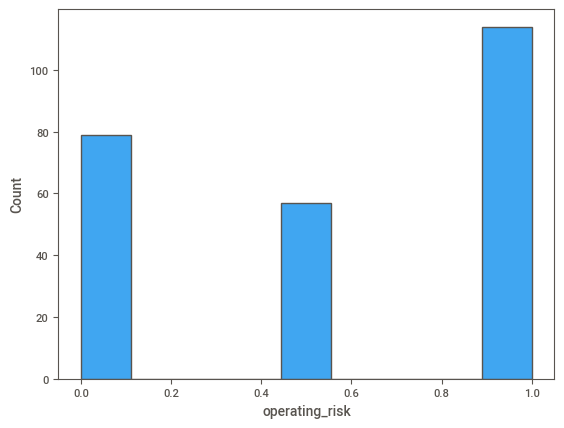

In [ ]:
for i in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[i])
  plt.show()

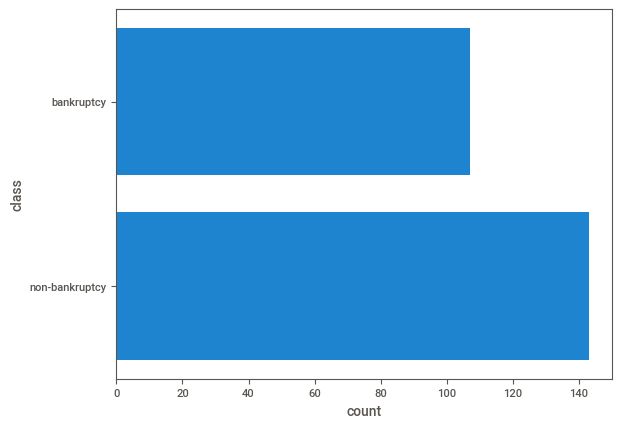

In [ ]:
sns.countplot(df['class'])
plt.show()

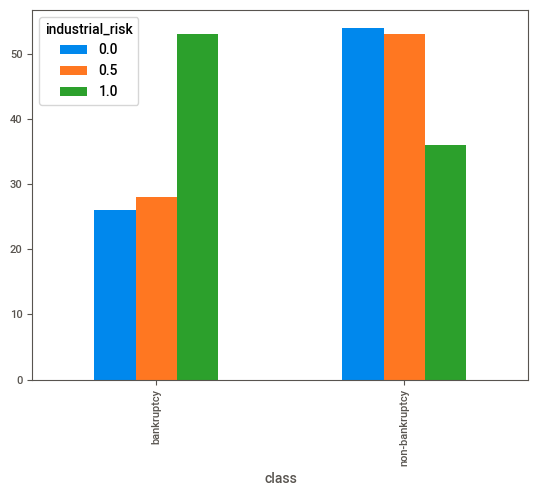

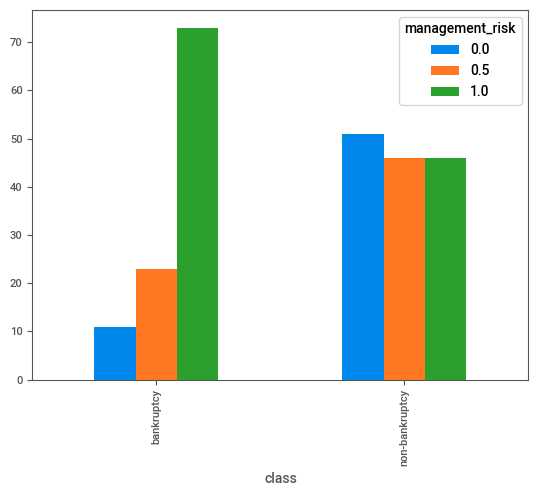

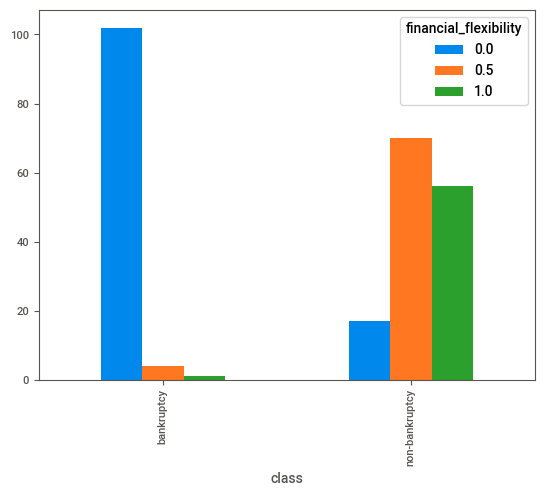

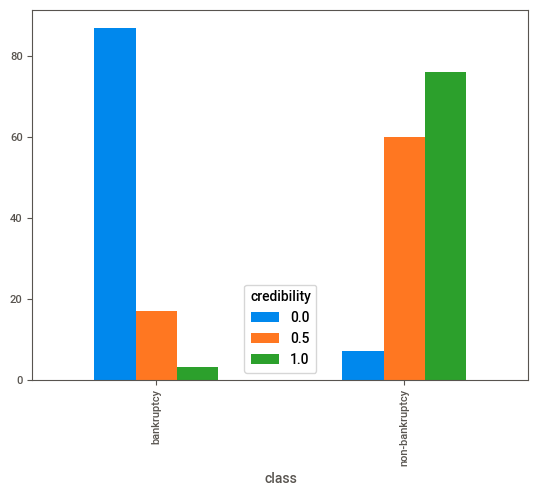

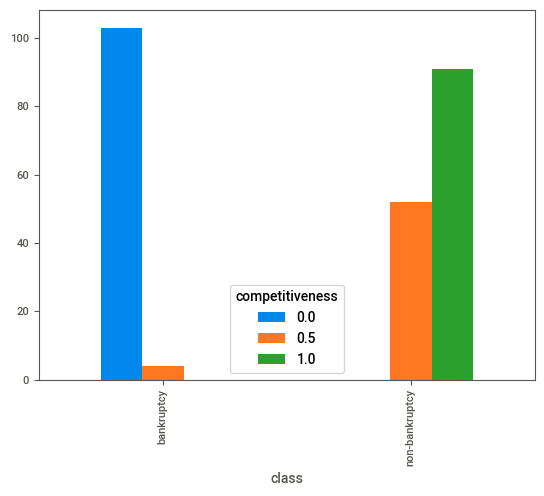

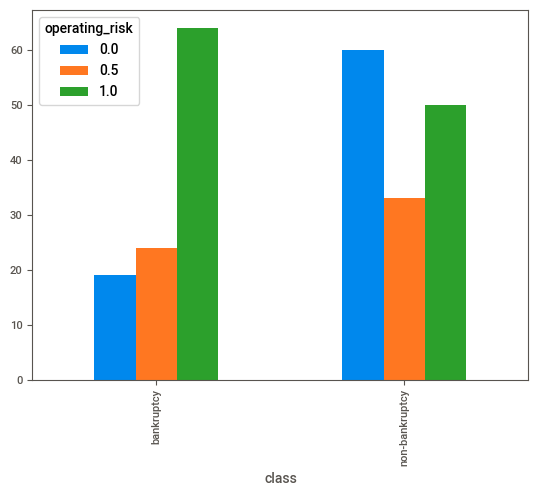

In [ ]:
for i in df.select_dtypes(include=['number']).columns:
  pd.crosstab(df['class'], df[i]).plot(kind='bar')
  plt.show()

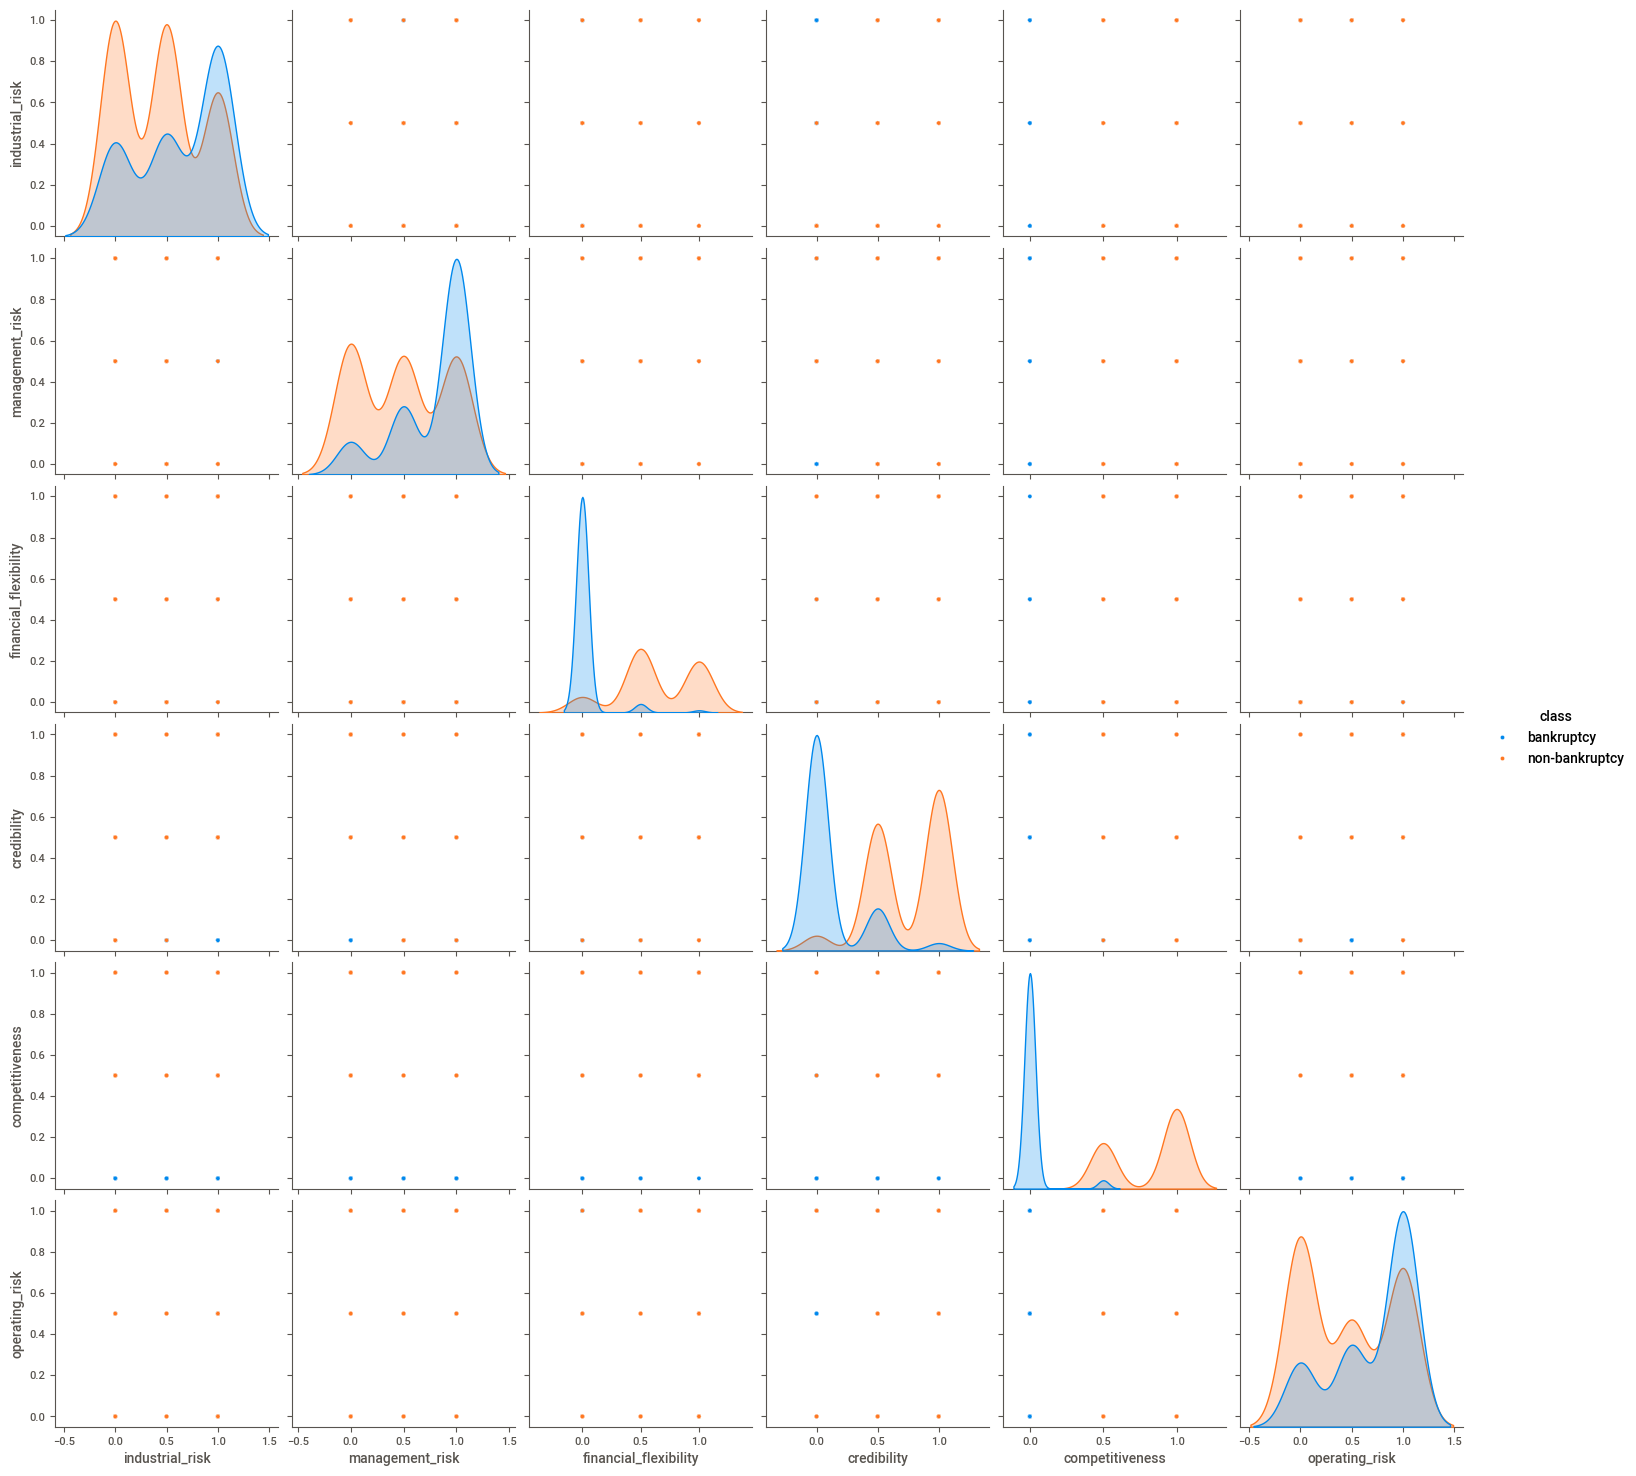

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative = True)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 21.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Bankruptacy_Prevention_EDA_PandasProfiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


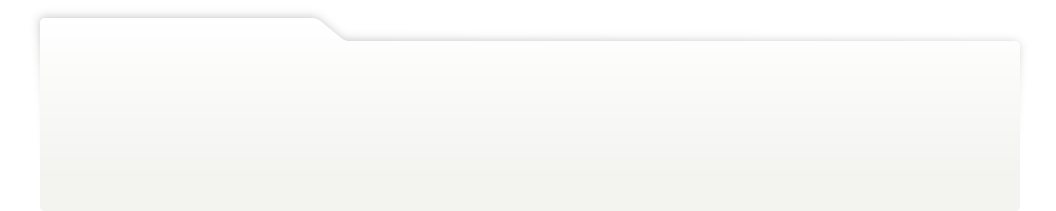
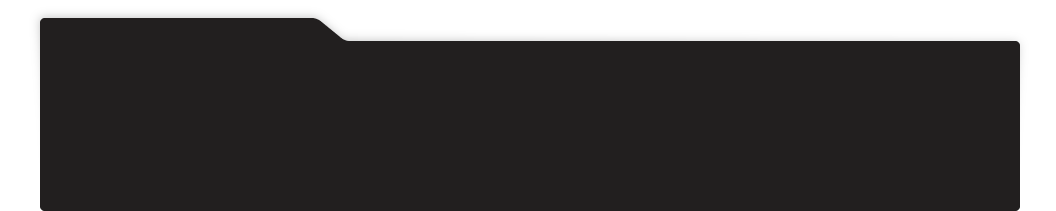
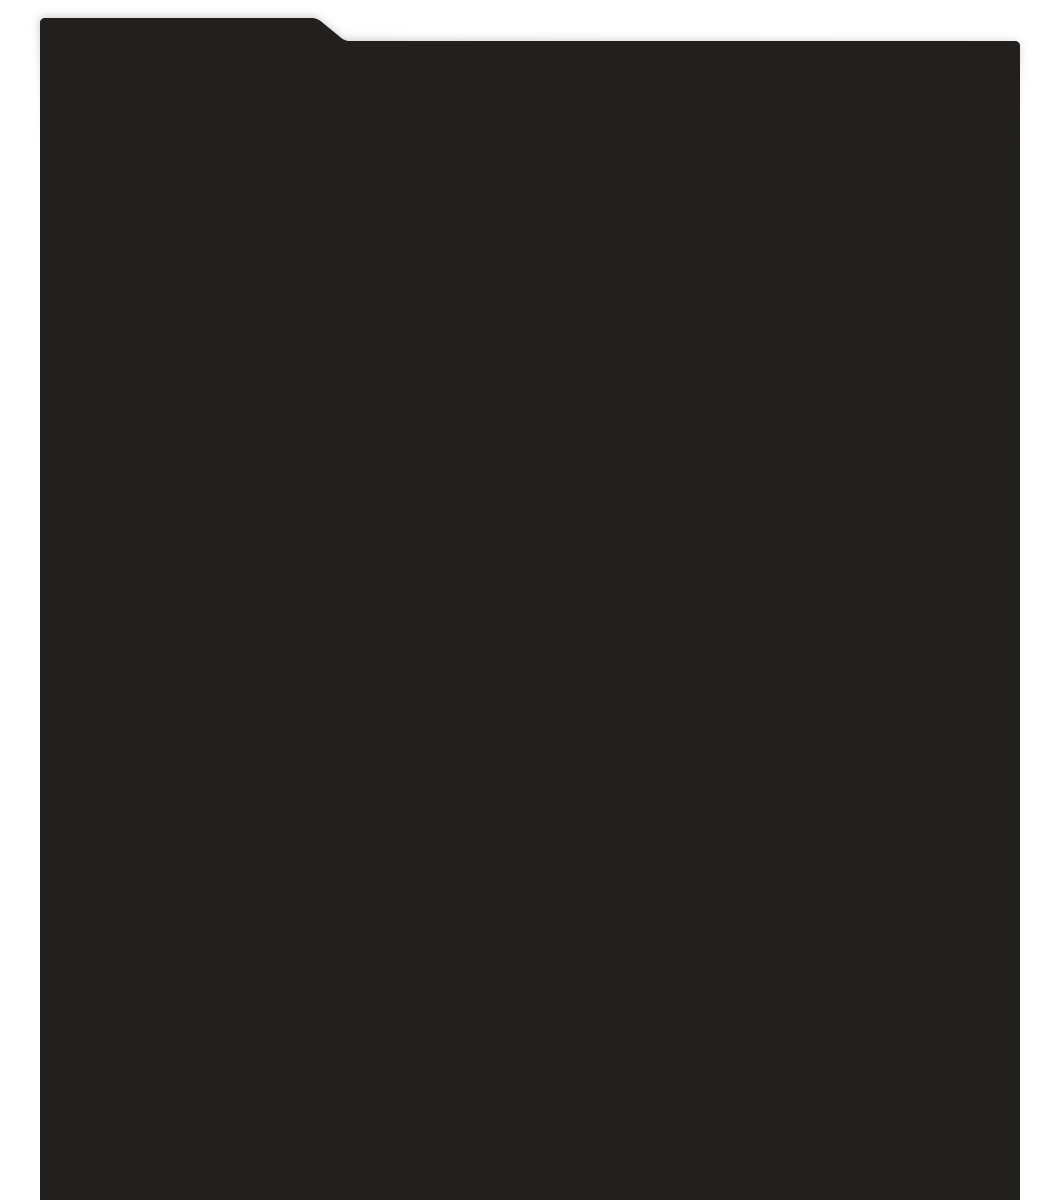
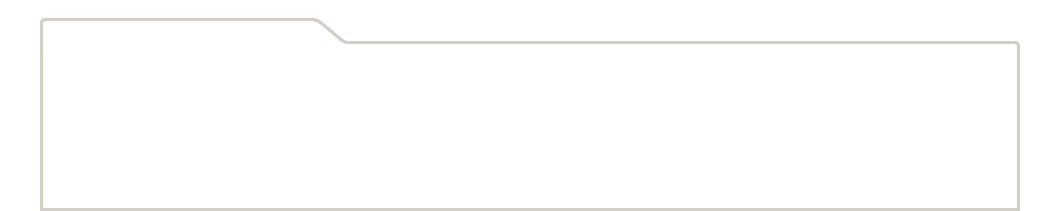
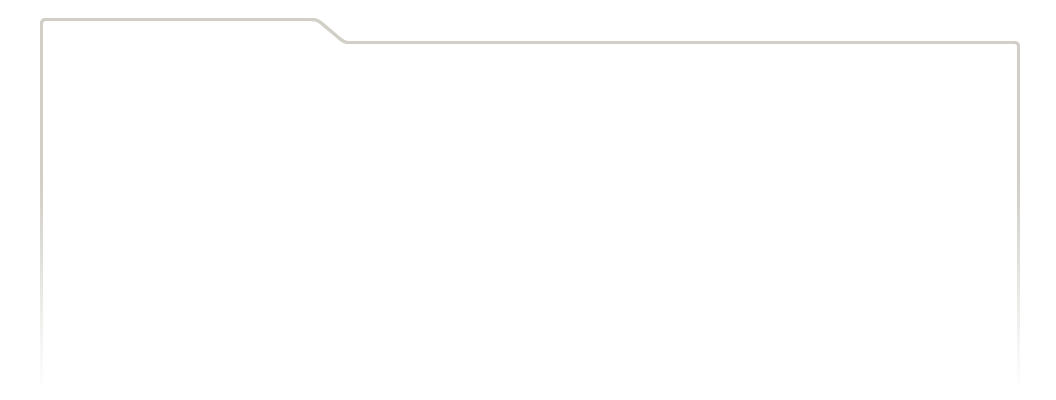
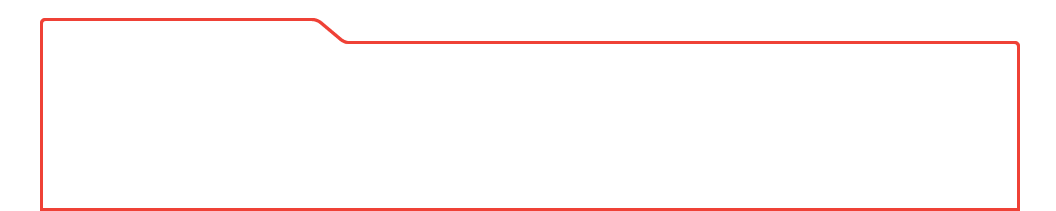
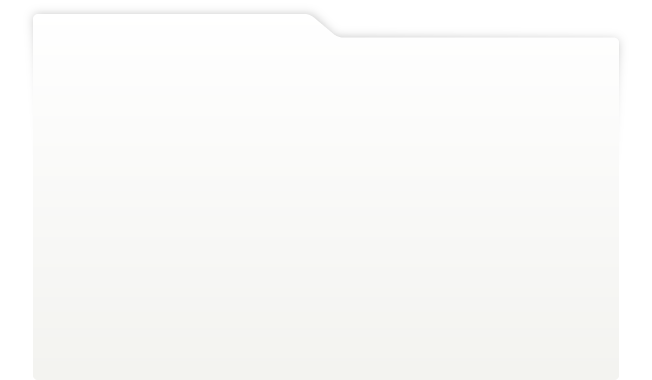
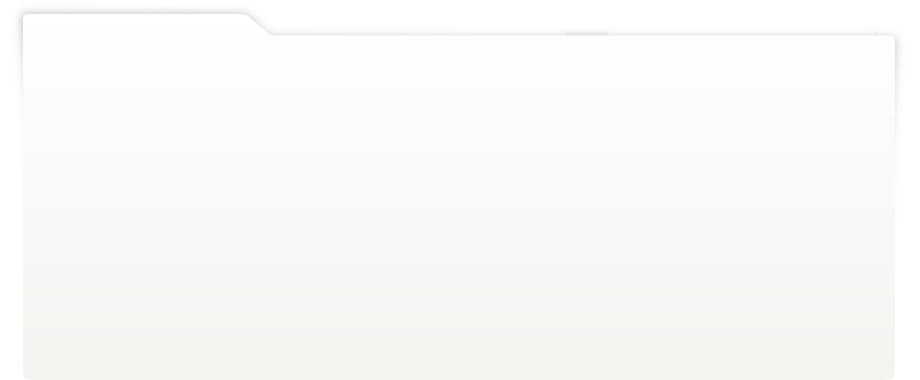
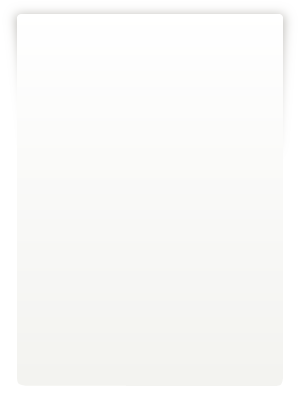
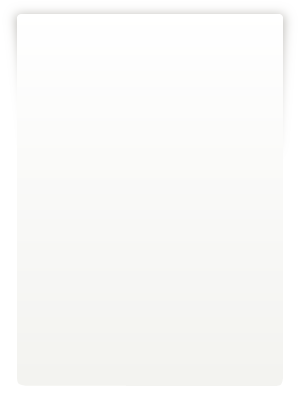
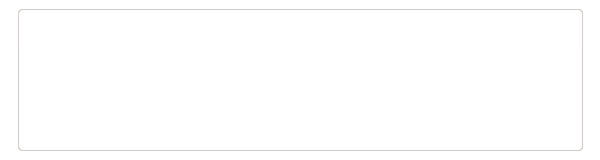
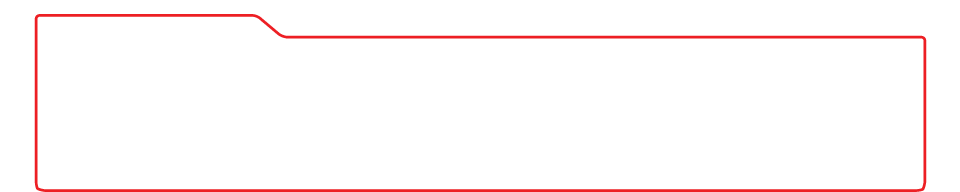
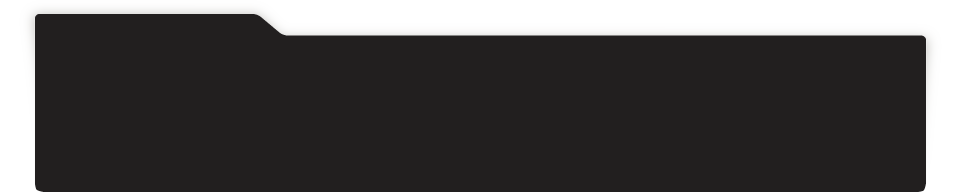
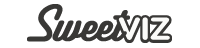
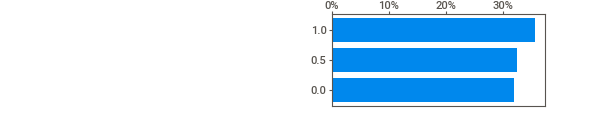
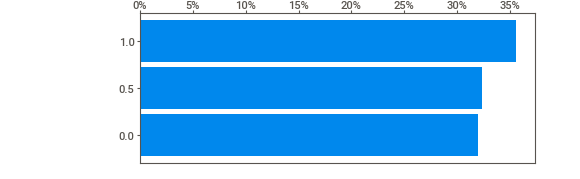
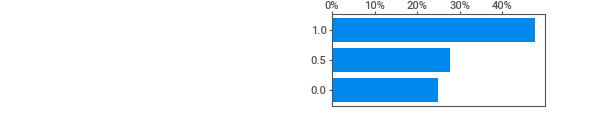
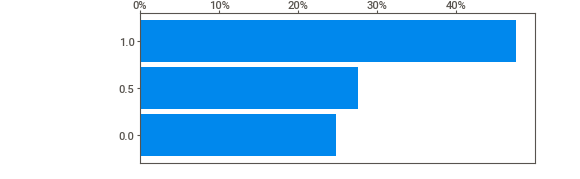
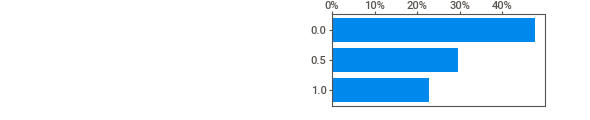
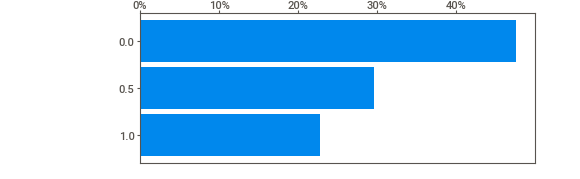
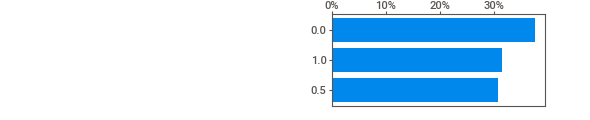
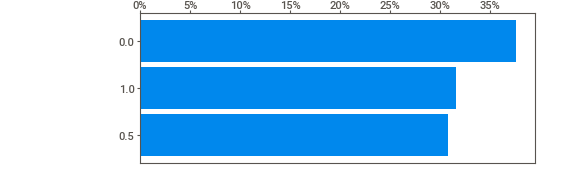
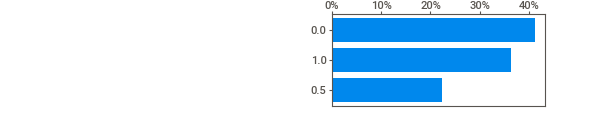
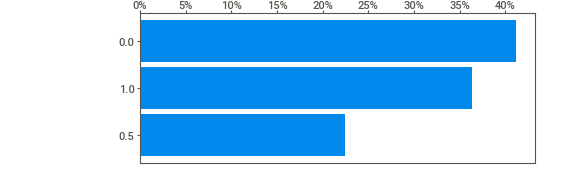
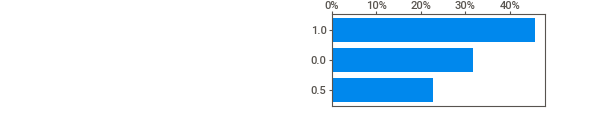
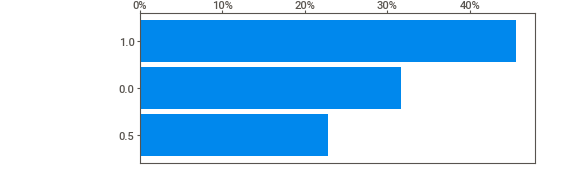
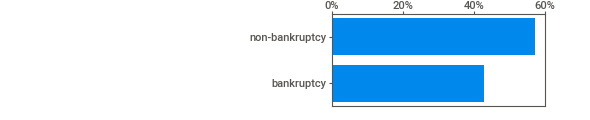
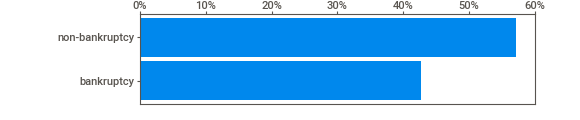
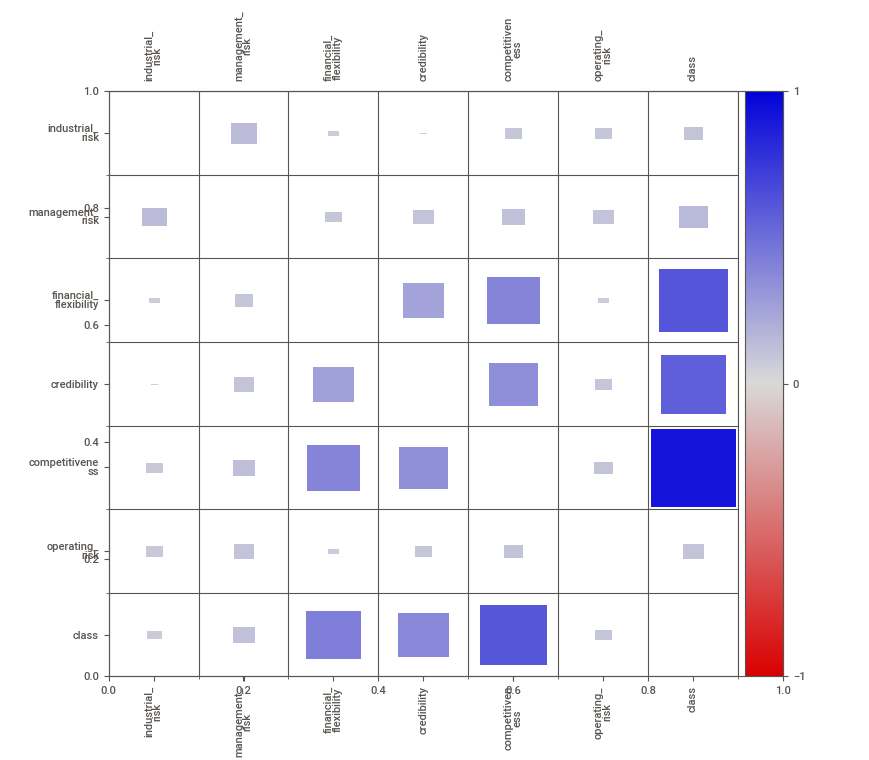
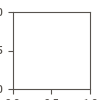

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='vertical' , w=1080, h=1080, scale=1)

In [ ]:
sweet_report.show_html('Bankruptacy_Prevention_EDA_SweetViz.html')

Report Bankruptacy_Prevention_EDA_SweetViz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df['class'] = df['class'].map({'bankruptcy': 1, "non-bankruptcy": 0})
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
from sklearn.ensemble import IsolationForest
outliers = IsolationForest(contamination=0.01)
outliers.fit(df)

IsolationForest(contamination=0.01)

In [ ]:
pred_outliers = outliers.predict(df)
pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
pd.concat((df, pd.Series(outliers.decision_function(df), columns = ['anomaly_score'])), axis=1)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,anomaly_score
0,0.5,1.0,0.0,0.0,0.0,0.5,1,0.148909
1,0.0,1.0,0.0,0.0,0.0,1.0,1,0.182748
2,1.0,0.0,0.0,0.0,0.0,1.0,1,0.088797
3,0.5,0.0,0.0,0.5,0.0,1.0,1,0.050160
4,1.0,1.0,0.0,0.0,0.0,1.0,1,0.201267
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0,0.084869
246,1.0,1.0,0.5,1.0,1.0,0.0,0,0.076980
247,0.0,1.0,1.0,0.5,0.5,0.0,0,0.071655
248,1.0,0.0,0.5,1.0,0.5,0.0,0,0.062916


In [ ]:
df[pred_outliers == -1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
36,1.0,1.0,0.0,1.0,0.0,0.0,1
72,1.0,0.5,1.0,0.5,0.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
df = df[pred_outliers != -1]
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_}).sort_values(by='Score', ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(


,Feature,Score
4,competitiveness,80.434480
2,financial_flexibility,61.985851
3,credibility,54.513344
1,management_risk,9.587466
5,operating_risk,6.830358
0,industrial_risk,3.907117


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
rfe = RFE(lr, n_features_to_select=4)
fit = rfe.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Selected': fit.support_, 'Ranking': fit.ranking_}).sort_values(by='Ranking')

,Feature,Selected,Ranking
1,management_risk,True,1
2,financial_flexibility,True,1
3,credibility,True,1
4,competitiveness,True,1
5,operating_risk,False,2
0,industrial_risk,False,3


In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree_based = RandomForestClassifier()
tree_based.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Importance': tree_based.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
4,competitiveness,0.454603
3,credibility,0.249067
2,financial_flexibility,0.235050
1,management_risk,0.023799
5,operating_risk,0.018855
0,industrial_risk,0.018626


### Feature Selection Inference

We applied three different feature selection techniques — **Chi-Square Test**, **Recursive Feature Elimination (RFE)**, and **Random Forest Feature Importance** — to identify the most influential features affecting bankruptcy prediction.

---

#### A. Chi-Square Test
- Measures the statistical relationship between each feature and the target variable.  
- **Top 3 Features:**  
  1. *Competitiveness*  
  2. *Financial Flexibility*  
  3. *Credibility*
  4. *Management Risk*

These features show the strongest dependency with the target class.

---

#### B. Recursive Feature Elimination (RFE) – Logistic Regression
- Iteratively removes the least important features based on model coefficients.  
- **Selected Features:**  
  1. *Management Risk*  
  2. *Financial Flexibility*  
  3. *Credibility*  
  4. *Competitiveness*  

RFE confirms that these four features provide the best linear predictive performance.

---

#### C. Random Forest Feature Importance
- Evaluates how much each feature contributes to reducing impurity in decision trees.  
- **Most Important Features:**  
  1. *Competitiveness* (highest importance)  
  2. *Credibility*  
  3. *Financial Flexibility*  
  3. *Management Risk*  

---

#### Cross-Method Consensus
All three methods consistently highlight **Competitiveness**, **Financial Flexibility**, and **Credibility** as the most important predictors.  
`Management Risk` also shows moderate significance, while `Operating Risk` and `Industrial Risk` contribute minimally.

---

#### Final Inference
- The features **Competitiveness**, **Financial Flexibility**, and **Credibility** are the **strongest indicators** for bankruptcy prevention so they need to be included, but **Management Risk** is (Optional) to include in the dataset.  
- These variables should be prioritized for model training and interpretation.  
- Less influential features like *Operating Risk* and *Industrial Risk* may be dropped to simplify the model without losing predictive accuracy.
